# mor

最適なx: 0.1


importance
Al2O3/SiO2     0.177955
H2O/SiO2       0.115585
MOH/SiO2       0.421778
temperature    0.172330
time           0.112353

false  mor
false    353    0
mor        0   58

false  mor
false    117    1
mor        1   18

正解率(Accuracy) : 訓練 1.0, 検証 0.9854014598540146
適合率(Precision) : 訓練 1.0, 検証 0.9473684210526315
再現率(Recall) : 訓練 1.0, 検証 0.9473684210526315
F1スコア : 訓練 1.0, 検証 0.9473684210526315


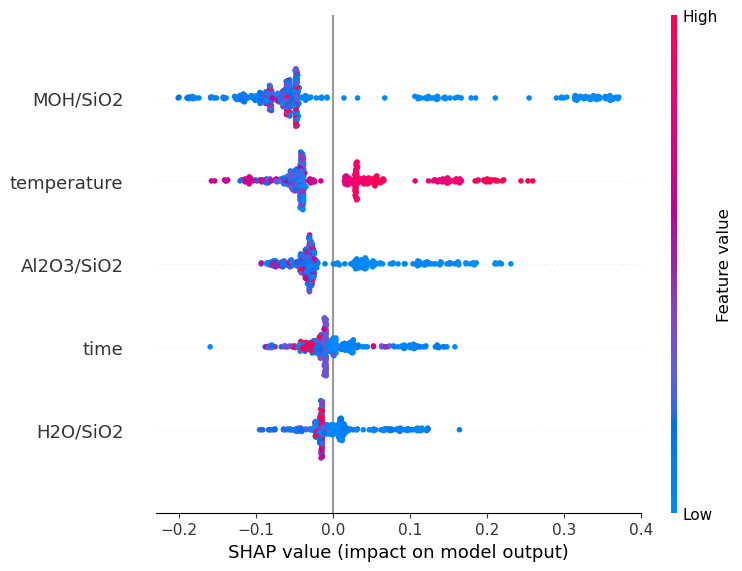

In [2]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[1].T, x_test, plot_size=(8, 6))

# jbw

最適なx: 0.1


importance
Al2O3/SiO2     0.195015
H2O/SiO2       0.174864
MOH/SiO2       0.247977
temperature    0.253176
time           0.128968

false  jbw
false    394    0
jbw        0   17

false  jbw
false    131    0
jbw        0    6

正解率(Accuracy) : 訓練 1.0, 検証 1.0
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 1.0


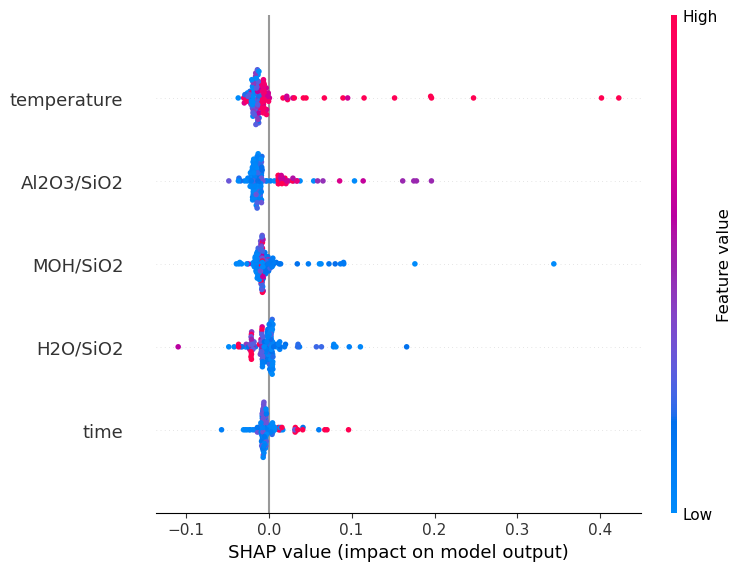

In [3]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[1].T, x_test, plot_size=(8, 6))

# d6r

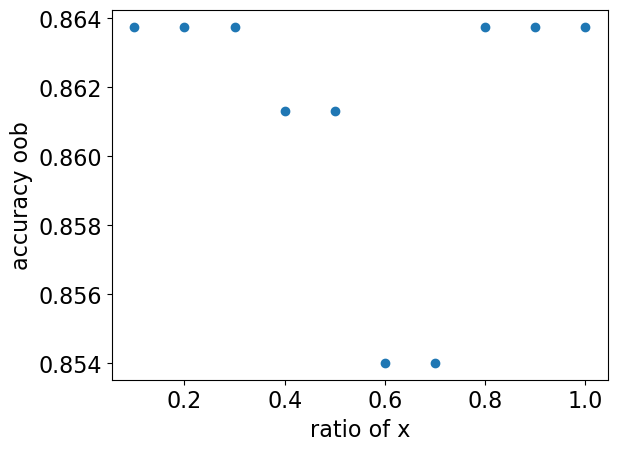

最適なx: 0.1


importance
Al2O3/SiO2     0.230104
H2O/SiO2       0.196284
MOH/SiO2       0.263448
temperature    0.160452
time           0.149712

d6r  false
d6r    135      1
false    1    274

d6r  false
d6r     36     10
false    8     83

正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.8686131386861314
適合率(Precision) : 訓練 0.9926470588235294, 検証 0.8181818181818182
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.782608695652174
F1スコア : 訓練 0.9926470588235294, 検証 0.8


In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[0].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[0].T, x_test, plot_size=(8, 6))

# d8r

最適なx: 0.6


importance
Al2O3/SiO2     0.242386
H2O/SiO2       0.207074
MOH/SiO2       0.240892
temperature    0.150617
time           0.159032

d8r  false
d8r     46      0
false    0    365

d8r  false
d8r     10      5
false    1    121

正解率(Accuracy) : 訓練 1.0, 検証 0.9562043795620438
適合率(Precision) : 訓練 1.0, 検証 0.9090909090909091
再現率(Recall) : 訓練 1.0, 検証 0.6666666666666666
F1スコア : 訓練 1.0, 検証 0.7692307692307693


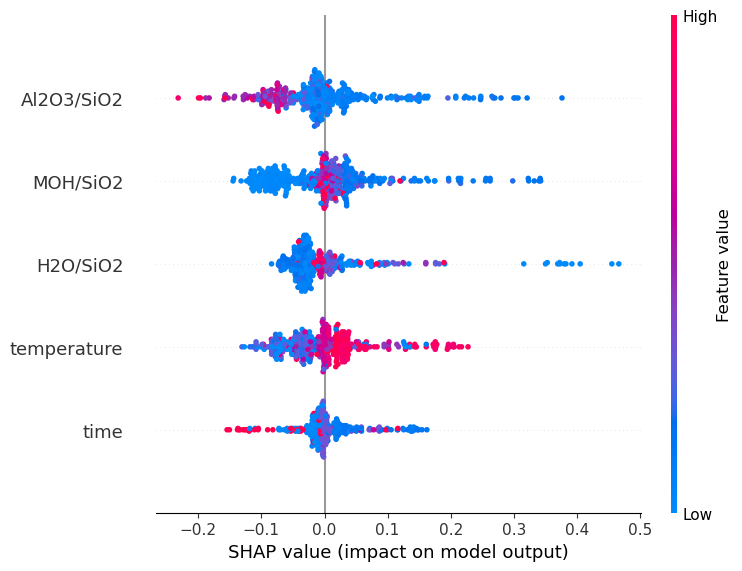

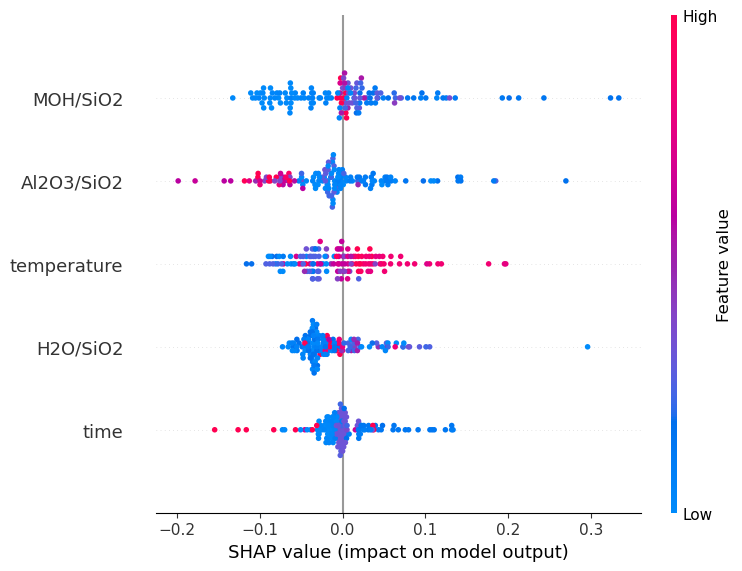

In [2]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[0].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[0].T, x_test, plot_size=(8, 6))

# can

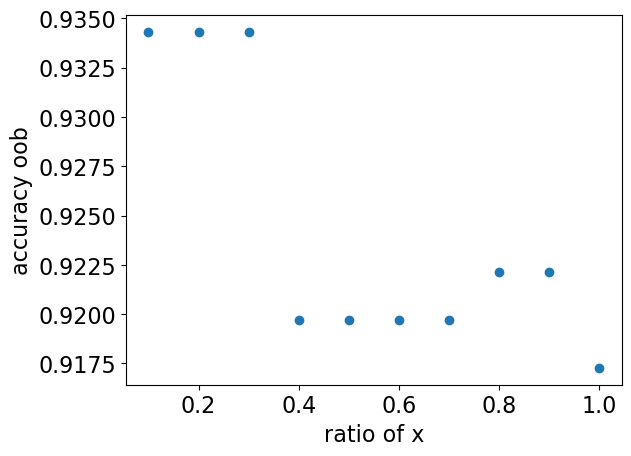

最適なx: 0.1


importance
Al2O3/SiO2     0.198340
H2O/SiO2       0.207133
MOH/SiO2       0.232092
temperature    0.199344
time           0.163092

can  false
can     82      1
false    0    328

can  false
can     24      4
false    1    108

正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.9635036496350365
適合率(Precision) : 訓練 1.0, 検証 0.96
再現率(Recall) : 訓練 0.9879518072289156, 検証 0.8571428571428571
F1スコア : 訓練 0.9939393939393939, 検証 0.9056603773584906


In [6]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[1].T, x_test, plot_size=(8, 6))

# sod

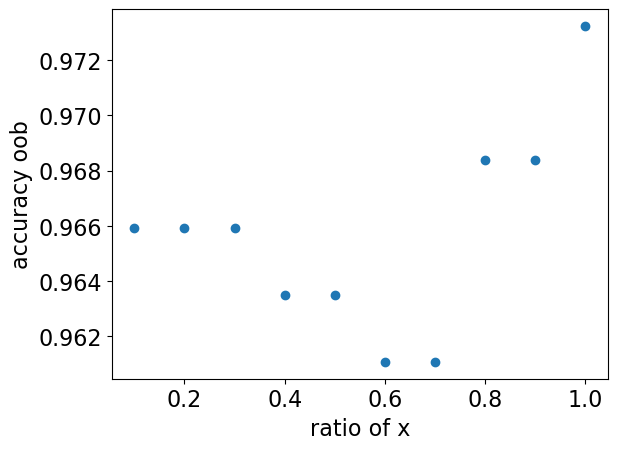

最適なx: 1.0


importance
Al2O3/SiO2     0.118580
H2O/SiO2       0.106830
MOH/SiO2       0.126599
temperature    0.555723
time           0.092268

false  sod
false    298    0
sod        0  113

false  sod
false     95    4
sod        5   33

正解率(Accuracy) : 訓練 1.0, 検証 0.9343065693430657
適合率(Precision) : 訓練 1.0, 検証 0.8918918918918919
再現率(Recall) : 訓練 1.0, 検証 0.868421052631579
F1スコア : 訓練 1.0, 検証 0.88


In [7]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[1].T, x_test, plot_size=(8, 6))

# lta

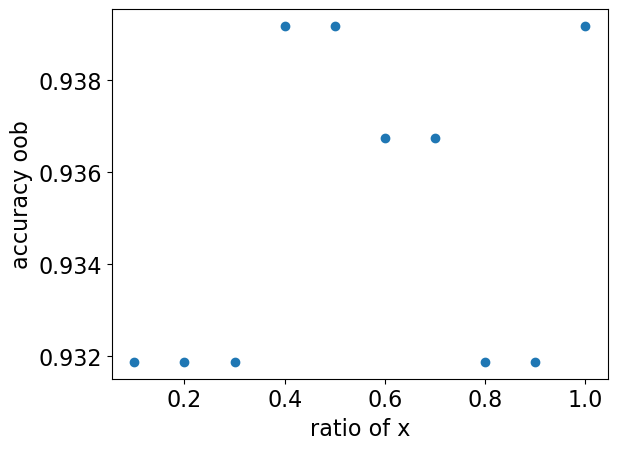

最適なx: 0.4


importance
Al2O3/SiO2     0.255117
H2O/SiO2       0.228244
MOH/SiO2       0.154623
temperature    0.262814
time           0.099201

false  lta
false    351    0
lta        0   60

false  lta
false    117    0
lta        4   16

正解率(Accuracy) : 訓練 1.0, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 0.8
F1スコア : 訓練 1.0, 検証 0.8888888888888888


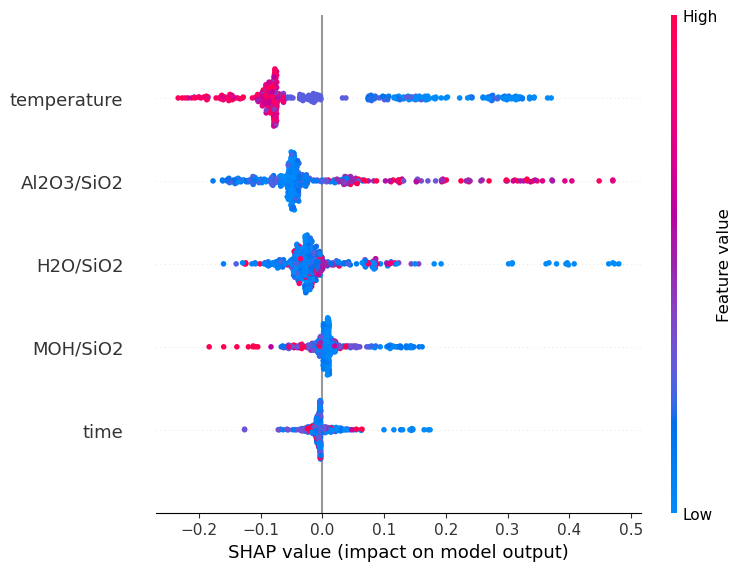

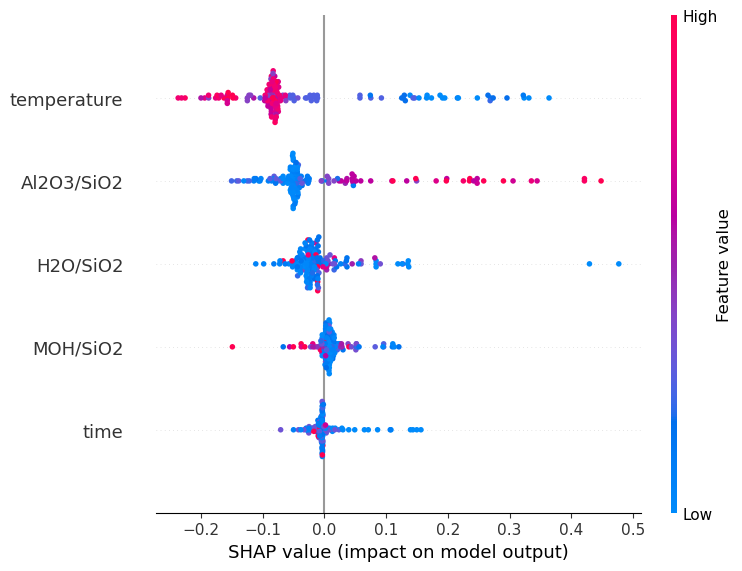

In [8]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, plot_size=(8, 6))
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_test).T
shap.summary_plot(P[1].T, x_test, plot_size=(8, 6))

# 4

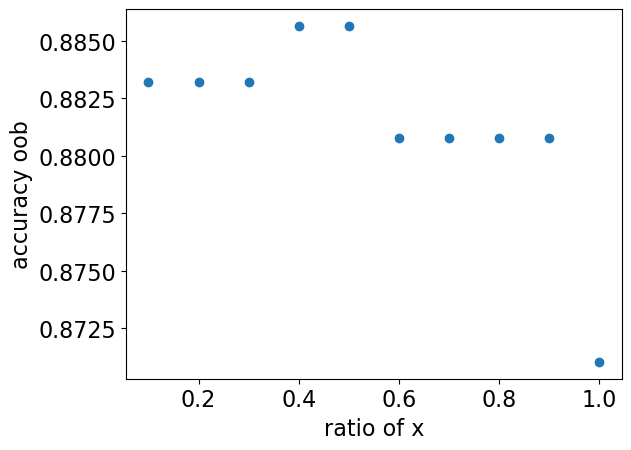

最適なx: 0.4


importance
Al2O3/SiO2     0.204236
H2O/SiO2       0.148827
MOH/SiO2       0.358778
temperature    0.171856
time           0.116303

4  false
4      236      0
false    2    173

4  false
4      76      3
false   9     49

正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.9124087591240876
適合率(Precision) : 訓練 0.9915966386554622, 検証 0.8941176470588236
再現率(Recall) : 訓練 1.0, 検証 0.9620253164556962
F1スコア : 訓練 0.9957805907172996, 検証 0.926829268292683


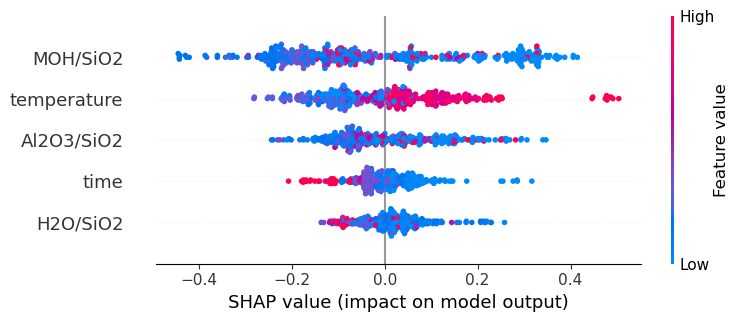

In [9]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# 6

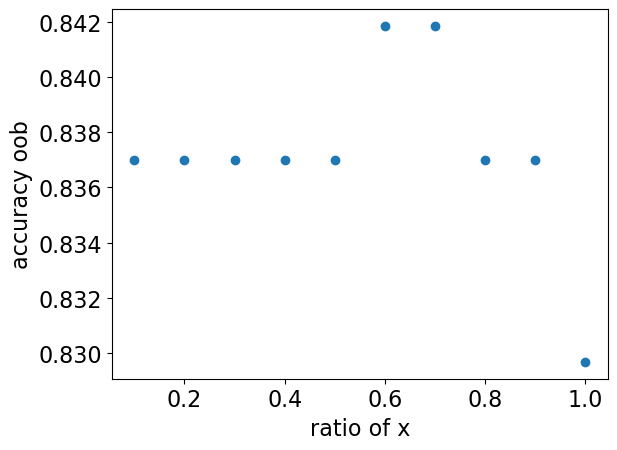

最適なx: 0.6


importance
Al2O3/SiO2     0.159742
H2O/SiO2       0.166651
MOH/SiO2       0.404713
temperature    0.133872
time           0.135022

6  false
6      230      0
false    1    180

ValueError: pos_label=6r is not a valid label. It should be one of ['6', 'false']

In [9]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# 8

In [ ]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# 5-1

In [ ]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# 4-2

In [ ]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# 6-2

In [ ]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)